In [1]:
# import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set_style("darkgrid")

from itables import init_notebook_mode, show
init_notebook_mode(all_interactive = False)

<IPython.core.display.Javascript object>

In [2]:
# read excel file
df = pd.read_excel('cuisine survey.xlsx')

In [3]:
# drop empty columns
df = df.dropna(thresh = 1, axis = 1)

In [4]:
# prepare multiindex
row_names = df.iloc[:,0].dropna()
cuisines = [name for name in row_names if 'cuisine' in name and 'eaten' not in name]
cuisine_ratings = [cuisines, row_names[1:10]]

# drop extra columns and rows
df = df.dropna(thresh = 2)
df.columns = df.iloc[0]
df = df.iloc[1:,1:]

# set multiindex
df.index = pd.MultiIndex.from_product(cuisine_ratings, names=['cuisine', 'rating'])

In [5]:
# drop rows for 'Unweighted base', 'Base', and '% of those who have ever eaten the cuisine that like it'
df = df.drop(pd.MultiIndex.from_product([cuisines, 
                                         ['Unweighted base', 
                                          'Base', 
                                          '% of those who have ever eaten the cuisine that like it']]))

In [6]:
df.columns.name = 'Country'

In [7]:
# exporting to excel
df.to_excel('df.xlsx')

In [8]:
dft = df.T
dft.columns = [str(name) for name in df.T.columns]

dft.to_excel('dft.xlsx')

In [9]:
# set color palette
greens = ['gray', '#C5E8B7', '#ABE098', '#83D475', '#57C84D', '#2EB62C']

# Average rating for each country

## All ratings

In [10]:
# get average ratings for each country without conditioning on people that have tried the cuisine
country_rating = df.groupby(level = 1).mean()

In [11]:
avg_country_rating = country_rating.T.sort_values('Like a lot', ascending = False)
avg_country_rating = avg_country_rating[['N/a - I have never eaten this cuisine',
                                         "Don't like at all",
                                         "Don't like very much",
                                         "Don't know",
                                         'Like a fair amount',
                                         'Like a lot']]

[]

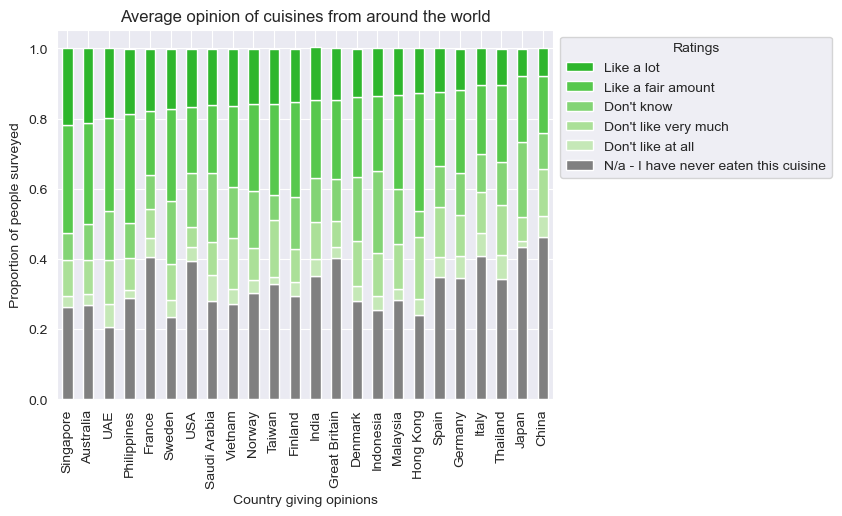

In [12]:
ax = avg_country_rating.plot.bar(stacked = True, 
                                 color = greens,
                                 legend = 'reverse',
                                 title = 'Average opinion of cuisines from around the world',
                                 xlabel = 'Country giving opinions',
                                 ylabel = 'Proportion of people surveyed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title = 'Ratings', bbox_to_anchor = (1.0, 1.0))
ax.plot()

## Only ratings from people who have tried the cuisine  

In [13]:
# calculate the proportions of ratings based on the people who have tried the cuisine
df2 = df.copy()
inds = df2.index
for ind in inds:
    if ind[1] != 'N/a - I have never eaten this cuisine':
        df2.loc[ind] = df.loc[ind]/(1 - df.loc[ind[0], 'N/a - I have never eaten this cuisine'])

In [14]:
# average the ratings across cuisines
country_rating_tried = df2.groupby(level = 1).mean()

In [15]:
avg_country_rating_tried = country_rating_tried.T.sort_values('Like a lot', ascending = False)
avg_country_rating_tried = avg_country_rating_tried[["Don't like at all",
                                                     "Don't like very much",
                                                     "Don't know",
                                                     'Like a fair amount',
                                                     'Like a lot']]

[]

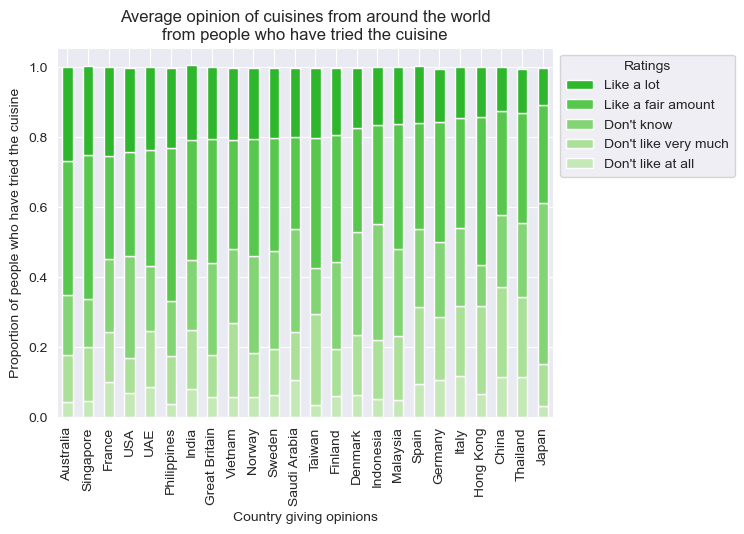

In [16]:
ax = avg_country_rating_tried.plot.bar(stacked = True, 
                                 color = greens[1:],
                                 legend = 'reverse',
                                 title = 'Average opinion of cuisines from around the world\n'
                                         + 'from people who have tried the cuisine',
                                 xlabel = 'Country giving opinions',
                                 ylabel = 'Proportion of people who have tried the cuisine')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title = 'Ratings', bbox_to_anchor = (1.0, 1.0))
ax.plot()

# Average rating for each cuisine

## All ratings

[]

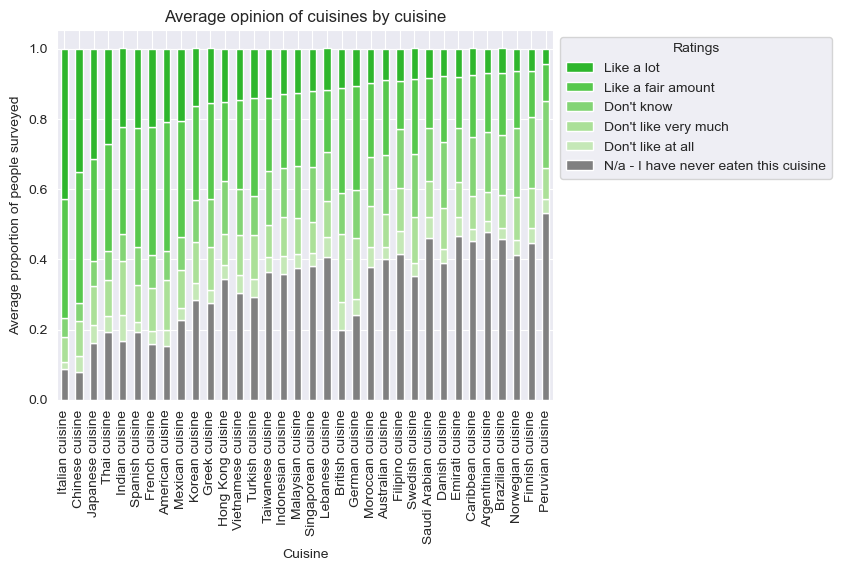

In [17]:
cuisine_avg = df.mean(axis = 1)
cuisine_avg = cuisine_avg.unstack()
cuisine_avg = cuisine_avg.sort_values("Like a lot", ascending = False)
cuisine_avg = cuisine_avg[['N/a - I have never eaten this cuisine',
                                         "Don't like at all",
                                         "Don't like very much",
                                         "Don't know",
                                         'Like a fair amount',
                                         'Like a lot']]
ax = cuisine_avg.plot.bar(stacked = True, 
                         color = greens,
                         legend = 'reverse',
                         title = 'Average opinion of cuisines by cuisine',
                         xlabel = 'Cuisine',
                         ylabel = 'Average proportion of people surveyed')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title = 'Ratings', bbox_to_anchor = (1.0, 1.0))
ax.plot()

## Only ratings from people who have tried the cuisine  

Still need to sort the columns from Like a lot to Don't like at all

Also remove the "N/a" option

[]

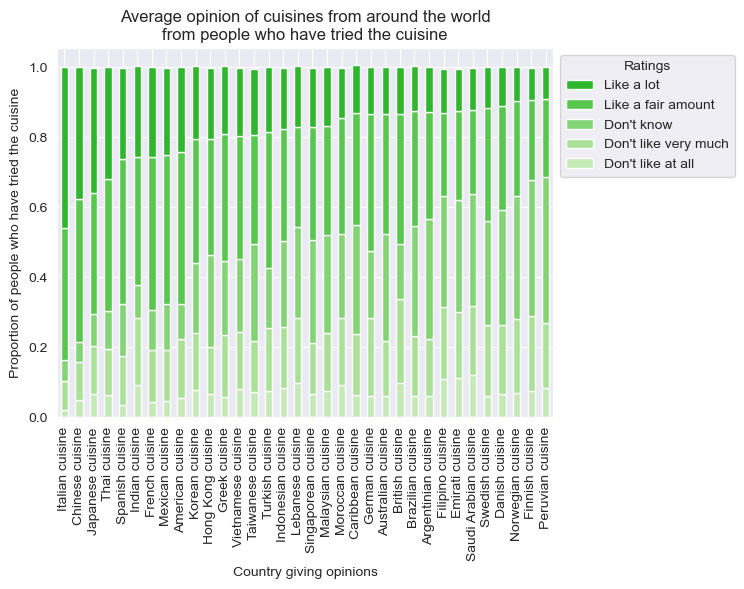

In [18]:
cuisine_avg_tried = df2.mean(axis = 1)
cuisine_avg_tried = cuisine_avg_tried.unstack()
cuisine_avg_tried = cuisine_avg_tried.sort_values("Like a lot", ascending = False)

cuisine_avg_tried = cuisine_avg_tried[["Don't like at all",
                                     "Don't like very much",
                                     "Don't know",
                                     'Like a fair amount',
                                     'Like a lot']]

ax = cuisine_avg_tried.plot.bar(stacked = True, 
                                 color = greens[1:],
                                 legend = 'reverse',
                                 title = 'Average opinion of cuisines from around the world\n'
                                         + 'from people who have tried the cuisine',
                                 xlabel = 'Country giving opinions',
                                 ylabel = 'Proportion of people who have tried the cuisine')
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[::-1], labels[::-1], title = 'Ratings', bbox_to_anchor = (1.0, 1.0))
ax.plot()